<a href="https://colab.research.google.com/github/vankhoa21991/cyberlab/blob/main/tutorial/week1_linear/theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline
import random
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear regression với tensorflow

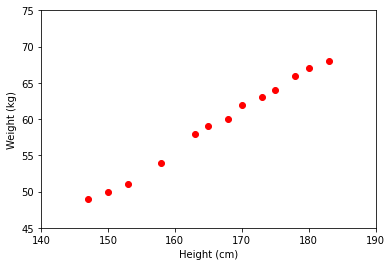

In [19]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [74]:
train_features = X[:11]
test_features = X[11:]

train_labels = y[:11]
test_labels = y[11:]

## Tính toán sử dụng sklearn

In [153]:
from sklearn.linear_model import LinearRegression

In [200]:
reg = LinearRegression()
reg.fit(X, y)

# print the model coefficients
print('Coefficients:', reg.coef_)
print('Bias:', reg.intercept_)

Coefficients: [[0.55920496]]
Bias: [-33.73541021]


In [201]:
reg.predict(test_features)

array([[66.92148294],
       [68.59909783]])

In [296]:
# Generate some example data
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 4, 5, 4.5, 6])
x = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], bias_initializer=tf.keras.initializers.Constant(0.1))
])

# Compile the model with an optimizer and loss function
model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.00001), loss='mse')

# Train the model on the data
model.fit(x, y, epochs=1000, verbose=0)

# Evaluate the trained model
weights, bias = model.get_weights()
print('Coefficients:', weights[0][0])
print('Bias:', bias[0])

# Predict on some new data
new_x = np.array([[6], [7], [8]])
predictions = model.predict(new_x)
print('Predictions:', predictions)

Coefficients: 0.3567442
Bias: 0.10417654
1/1 [==============================] - 0s 52ms/step
Predictions: [[2.2446418]
 [2.6013858]
 [2.9581301]]


## Tính toán bằng tensorflow

In [22]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.11.0


In [329]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], kernel_initializer=tf.keras.initializers.Constant(0.1), bias_initializer=tf.keras.initializers.Constant(0.1))
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse')
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [330]:
model.predict(train_features)

1/1 [==============================] - 0s 51ms/step


array([[14.8     ],
       [15.1     ],
       [15.400001],
       [15.900001],
       [16.400002],
       [16.6     ],
       [16.900002],
       [17.1     ],
       [17.400002],
       [17.6     ],
       [17.900002]], dtype=float32)

In [331]:
history = model.fit(
    train_features,
    train_labels,
    epochs=200,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

In [332]:
weights, bias = model.get_weights()
print('Coefficients:', weights)
print('Bias:', bias[0])

Coefficients: [[0.260782]]
Bias: 0.26064903


In [333]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,val_loss,epoch
0,1563.570068,2165.533936,0
1,1550.922119,2149.155273,1
2,1538.327393,2132.842041,2
3,1525.786255,2116.594727,3
4,1513.299683,2100.415039,4


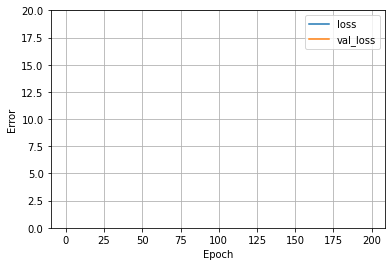

In [334]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 20])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [248]:
y_pred = model.predict(train_features)
y_pred

1/1 [==============================] - 0s 26ms/step


array([[48.890617],
       [50.483482],
       [52.076347],
       [54.731133],
       [57.38591 ],
       [58.447823],
       [60.040688],
       [61.1026  ],
       [62.695465],
       [63.757378],
       [65.35025 ]], dtype=float32)

In [249]:
def plot(x, y):
  plt.scatter(train_features, train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.legend()

In [250]:
x = tf.linspace(140, 189, 190)
y_pred = model.predict(x)

6/6 [==============================] - 0s 2ms/step


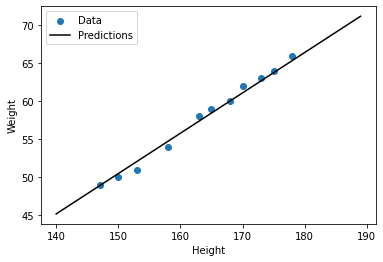

In [251]:
plot(x, y_pred)

In [252]:
model.predict(test_features)

1/1 [==============================] - 0s 29ms/step


array([[66.41216],
       [68.00503]], dtype=float32)

# Linear regression với pytorch

In [2]:
def synthetic_data(w, b, num_examples):  
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.3369, -0.4857]) 
label: tensor([3.1712])


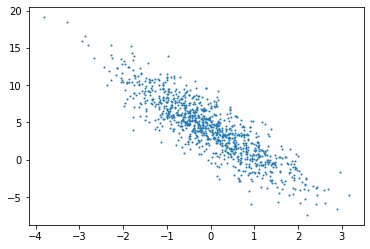

In [5]:
plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(), 1);

## Solve with gradient descent

In [6]:
# dataloader
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2241,  0.5666],
        [ 0.5130,  0.1888],
        [-0.6608, -0.1084],
        [-0.6809, -0.5367],
        [ 0.4570, -0.5945],
        [-1.0138, -0.6711],
        [ 1.0391,  0.0913],
        [ 0.2555, -0.1703],
        [ 0.2779, -0.5333],
        [-0.5160,  0.3799]]) 
 tensor([[1.8314],
        [4.5896],
        [3.2387],
        [4.6824],
        [7.1537],
        [4.4493],
        [5.9593],
        [5.2822],
        [6.5593],
        [1.8758]])


In [7]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):  #@save
    """The linear regression model."""
    return torch.matmul(X, w) + b

In [9]:
def squared_loss(y_hat, y):  #@save
    """Squared loss."""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [10]:
def sgd(params, lr, batch_size):  #@save
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [12]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        out = net(X, w, b)
        l = loss(out, y)  # Minibatch loss in `X` and `y`
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.034239
epoch 2, loss 0.000129
epoch 3, loss 0.000051


In [13]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0002, -0.0005], grad_fn=<SubBackward0>)
error in estimating b: tensor([0.0008], grad_fn=<RsubBackward1>)
